# Confusion Matrix

## Imports

In [23]:
# IMPORTS
import os
import shutil
import time
import sys
import random

import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mpcol
from matplotlib.ticker import FormatStrFormatter

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

from scipy import stats
from sklearn import datasets, mixture

from termcolor import colored, cprint
# Termcolor guide: https://pypi.org/project/termcolor/

from openpyxl import Workbook
from openpyxl import load_workbook

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

import seaborn as sns

%matplotlib widget
# %matplotlib inline
# %matplotlib notebook

# Try to use this website to use the explode feature, so we can see internal blocks and space everything out
# https://terbium.io/2017/12/matplotlib-3d/ 

# Use this website to make your GIFs - generally 50 delay per frame is good
# https://ezgif.com/maker



In [24]:
%pwd

'/Users/liamroy/Documents/Studies/Monash_31194990/PHD/Studies/Study_03/LLM_motion/scripts'

## Create the Matrix

In [25]:
# Matrix Data Setup

excel_filepath = '/Users/liamroy/Documents/Studies/Monash_31194990/PHD/Studies/Study_03/LLM_motion/data/part2_classification/final_results/final_text.xlsx'
excel_sheetname = 'ACCURACY_RANDOM' #ACCURACY_GPT4 or ACCURACY_HUMAN or ACCURACY_RANDOM
table_cols = "A:I"
table_rows = 300 # 900 or 300
actual_class = ['Waiting for Input', 'Analyzing Object', 'Found Object', 'Needs Help', 'Confused']
predicted_class = ['Waiting for Input', 'Analyzing Object', 'Found Object', 'Needs Help', 'Confused', 'None of These']
plot_title = '\nClassification Confusion Matrix from Random Generated Poses\n'
plotter = None # None or True
save_str = '/Users/liamroy/Documents/Studies/Monash_31194990/PHD/Studies/Study_03/LLM_motion/plots/conf_matrix/confusion_matrix_random' # or None

In [26]:
def getConfusionMatrix(excel_file_path, excel_file_sheet, columns_in_table, rows_in_table, actual_classes, predicted_classes):
    # Number of classes is N
    # Creates the N x M grid for the predictions for each class
    # Rows are actual classes, columns are predicted classes
    confMat = np.zeros((len(actual_classes),len(predicted_classes)), dtype=np.int32)   
    accuracy_df = pd.read_excel(excel_file_path, sheet_name = excel_file_sheet, header=0, index_col=None, na_values=['NA'], usecols=columns_in_table, nrows=rows_in_table)
    # print(accuracy_df)

    selected_columns = ['real_state_idx', 'response_idx']
    accuracy_array = accuracy_df[selected_columns].to_numpy()
    print(f'accuracy_array shape: {accuracy_array.shape} \n{accuracy_array}')
    
    np.add.at(confMat, (accuracy_array[:, 0], accuracy_array[:, 1]), 1)
    
    # For each item, go to that real states index, and add a +1 to the percived state index
    # Create a print statement w/ counter, and a note adding a +1 to predixion X for real state state X

    return confMat

In [27]:
# Test - replace with other
# confMat = np.random.randint(20, size=(10,10), dtype=np.int32)
confMat = getConfusionMatrix(excel_file_path=excel_filepath, excel_file_sheet=excel_sheetname, columns_in_table=table_cols, rows_in_table=table_rows, actual_classes=actual_class, predicted_classes=predicted_class)


accuracy_array shape: (300, 2) 
[[0 1]
 [0 4]
 [0 4]
 [0 3]
 [0 5]
 [0 2]
 [0 4]
 [0 2]
 [0 4]
 [0 4]
 [0 2]
 [0 1]
 [0 4]
 [0 2]
 [0 2]
 [0 4]
 [0 4]
 [0 4]
 [0 1]
 [0 3]
 [0 4]
 [0 1]
 [0 4]
 [0 5]
 [0 1]
 [0 4]
 [0 3]
 [0 2]
 [0 4]
 [0 4]
 [0 1]
 [0 4]
 [0 4]
 [0 3]
 [0 4]
 [0 4]
 [0 3]
 [0 0]
 [0 2]
 [0 4]
 [0 2]
 [0 2]
 [0 3]
 [0 2]
 [0 2]
 [0 1]
 [0 2]
 [0 1]
 [0 2]
 [0 4]
 [0 4]
 [0 2]
 [0 3]
 [0 3]
 [0 4]
 [0 3]
 [0 1]
 [0 4]
 [0 5]
 [0 2]
 [1 3]
 [1 3]
 [1 3]
 [1 1]
 [1 0]
 [1 0]
 [1 4]
 [1 0]
 [1 5]
 [1 3]
 [1 4]
 [1 3]
 [1 0]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 0]
 [1 2]
 [1 4]
 [1 3]
 [1 0]
 [1 4]
 [1 3]
 [1 3]
 [1 2]
 [1 3]
 [1 3]
 [1 5]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 5]
 [1 3]
 [1 5]
 [1 5]
 [1 3]
 [1 3]
 [1 4]
 [1 4]
 [1 3]
 [1 5]
 [1 3]
 [1 3]
 [1 0]
 [1 5]
 [1 3]
 [1 4]
 [1 3]
 [1 3]
 [1 3]
 [1 0]
 [1 3]
 [1 3]
 [2 4]
 [2 4]
 [2 1]
 [2 4]
 [2 1]
 [2 3]
 [2 1]
 [2 5]
 [2 2]
 [2 3]
 [2 2]
 [2 1]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 1]
 [2 4]
 [

In [28]:
# Plotting Setup
fig, axs = plt.subplots(figsize=(12, 12))

# Percentage Conversion 

# Set the normalization range from 0 to 40 and apply it to the imshow function
norm = mpcol.Normalize(vmin=0, vmax=60)
im = axs.imshow(confMat, cmap='viridis', norm=norm)

# Title and Axes Labels
axs.set_title(plot_title, size=24)
axs.set_xlabel("Robot State Selected by User", size=24)
axs.set_ylabel("True Robot State\n", size=24)

# Show all ticks and label them with the respective list entries
axs.set_yticks(np.arange(len(actual_class)), labels=actual_class)
axs.set_xticks(np.arange(len(predicted_class)), labels=predicted_class)

# Rotate the tick labels and set their alignment.
plt.setp(axs.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", size=15)
plt.setp(axs.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor", size=15)

# Make the Sidebar
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=18)


# Loop over data dimensions and create text annotations.
for i in range(len(actual_class)):
    for j in range(len(predicted_class)):
        text = axs.text(j, i, confMat[i, j],
                        ha="center", va="center", color="w", size=20)

fig.tight_layout()

# Save the fig
plt.savefig(save_str, bbox_inches='tight', pad_inches=0.25)

# Show the fig if plotter is not set to None
if plotter:
    plt.show()

if plotter == None:
    print("Plots closed.")
    plt.close()

Plots closed.


# Archive

/var/folders/vx/sqc7hy3d7tzbzb4vn45c7n8h0000gn/T/ipykernel_74619/3722676452.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.cm.get_cmap('magma')((mpcol.Normalize(vmin=0, vmax=40)(np.power(confMat,1/3)))*0.8)


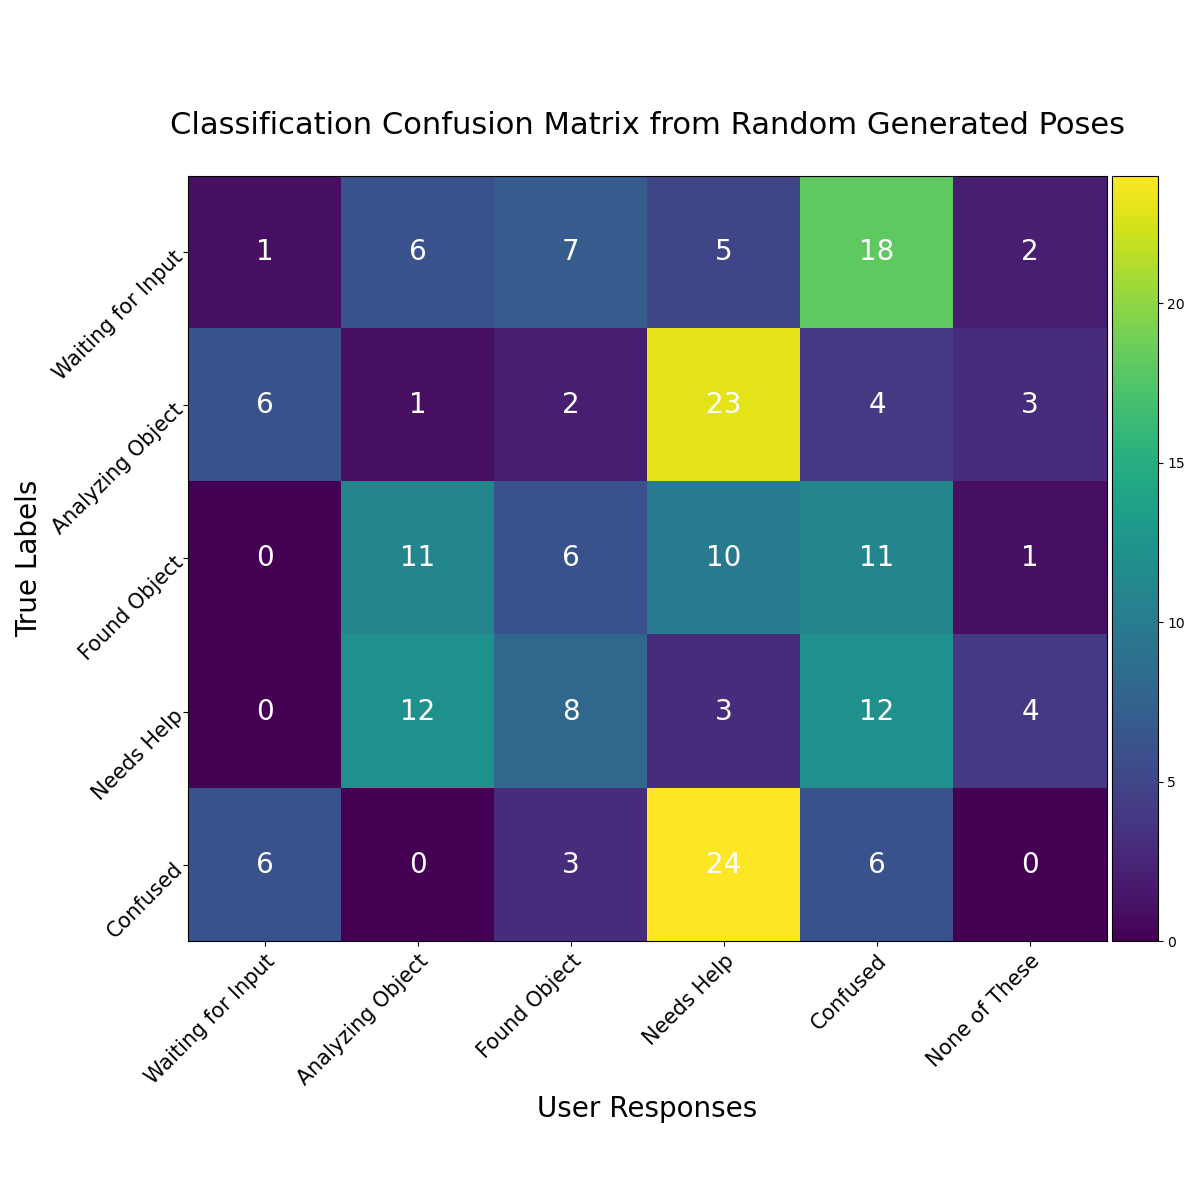

In [144]:
# Plotting Setup
fig, axs = plt.subplots(figsize=(12, 12))
im = axs.imshow(confMat)

# Title and Axes Labels
axs.set_title(plot_title, size = 22)
axs.set_xlabel("User Responses", size = 20)
axs.set_ylabel("True Labels", size = 20)


# Show all ticks and label them with the respective list entries
axs.set_yticks(np.arange(len(actual_class)), labels=actual_class)
axs.set_xticks(np.arange(len(predicted_class)), labels=predicted_class)


# Rotate the tick labels and set their alignment.
plt.setp(axs.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", size=15)
plt.setp(axs.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor", size=15)


plt.cm.get_cmap('magma')((mpcol.Normalize()(np.power(confMat,1/3)))*0.8)

# # Make the Sidebar
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# Loop over data dimensions and create text annotations.
for i in range(len(actual_class)):
    for j in range(len(predicted_class)):
        text = axs.text(j, i, confMat[i, j],
                       ha="center", va="center", color="w", size=20)

        
fig.tight_layout()

# Save the fig
plt.savefig(save_str, bbox_inches='tight', pad_inches=0.25)

# Show the fig if plotter is not set to None
if plotter:
    plt.show()

if plotter == None:
    print(" Plots closed. ")
    matplotlib.pyplot.close()